In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données (simulées ici, remplace "data.csv" par ton fichier réel)
data = {
    "Nom": ["Game A", "Game B", "Game C", "Game D", "Game E"],
    "Genre": ["Action", "RPG", "Action", "Sport", "RPG"],
    "Plateforme": ["PS5", "PC", "Xbox", "PS5", "PC"],
    "Ventes_Globales": [2.5, 1.8, 3.2, 0.9, 2.0],
    "Note": [8.5, 9.2, 7.8, 6.5, 9.0],
    "Année": [2022, 2021, 2022, 2023, 2021]
}

df = pd.DataFrame(data)

# Affichage des premières lignes
display(df)


,Nom,Genre,Plateforme,Ventes_Globales,Note,Année
0,Game A,Action,PS5,2.5,8.5,2022
1,Game B,RPG,PC,1.8,9.2,2021
2,Game C,Action,Xbox,3.2,7.8,2022
3,Game D,Sport,PS5,0.9,6.5,2023
4,Game E,RPG,PC,2.0,9.0,2021


In [2]:

# Nettoyage des données : Suppression des valeurs manquantes
df.dropna(inplace=True)

# Vérification des types
display(df.dtypes)


Nom                 object
Genre               object
Plateforme          object
Ventes_Globales    float64
Note               float64
Année                int64
dtype: object

In [3]:

# Calcul des ventes moyennes par genre
ventes_par_genre = df.groupby("Genre")["Ventes_Globales"].mean()
display(ventes_par_genre)


Genre
Action    2.85
RPG       1.90
Sport     0.90
Name: Ventes_Globales, dtype: float64

In [4]:

# Trouver le jeu le mieux noté par année
best_games = df.loc[df.groupby("Année")["Note"].idxmax()]
display(best_games)


,Nom,Genre,Plateforme,Ventes_Globales,Note,Année
1,Game B,RPG,PC,1.8,9.2,2021
0,Game A,Action,PS5,2.5,8.5,2022
3,Game D,Sport,PS5,0.9,6.5,2023


In [5]:

# Détection des anomalies (ventes très élevées ou très faibles)
q1 = df["Ventes_Globales"].quantile(0.25)
q3 = df["Ventes_Globales"].quantile(0.75)
iqr = q3 - q1
anomalies = df[(df["Ventes_Globales"] < (q1 - 1.5 * iqr)) | (df["Ventes_Globales"] > (q3 + 1.5 * iqr))]
display(anomalies)


,Nom,Genre,Plateforme,Ventes_Globales,Note,Année


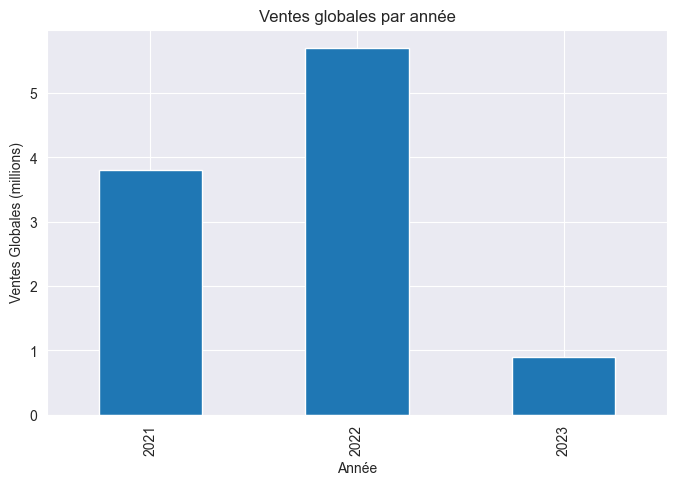

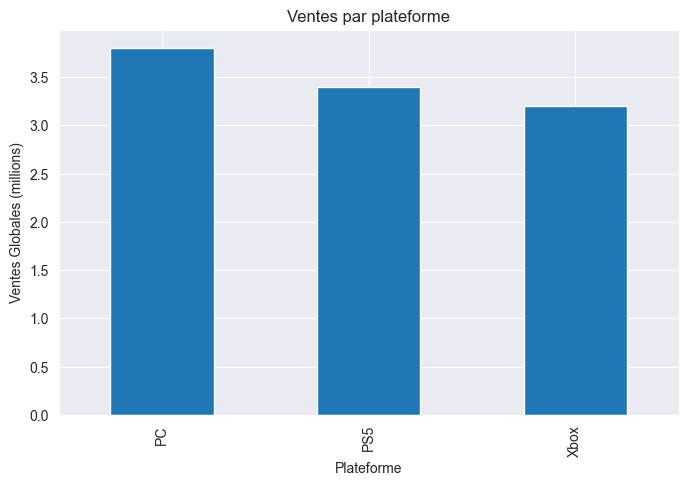

In [6]:

# Visualisation des tendances
plt.figure(figsize=(8,5))
df.groupby("Année")["Ventes_Globales"].sum().plot(kind='bar', title='Ventes globales par année')
plt.xlabel("Année")
plt.ylabel("Ventes Globales (millions)")
plt.show()

plt.figure(figsize=(8,5))
df.groupby("Plateforme")["Ventes_Globales"].sum().plot(kind='bar', title='Ventes par plateforme')
plt.xlabel("Plateforme")
plt.ylabel("Ventes Globales (millions)")
plt.show()
